# Plotter
Drawing final plots for results using this notebook depends on having the output of `systematics-fit.ipynb` as well as the initial results from `src/data/bsa.py`.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('text', usetex=True)

In [2]:
!mkdir -p image/

In [3]:
data = {}
data['phi'] = pd.read_csv('results/phi/sys.csv')
data['fit'] = pd.read_csv('results/fit/sys.csv')
#data['fit'] = pd.read_csv('replica-test.csv')

In [4]:
data['fit'].columns

Index([u'axis', u'axis_bin', u'axis_max', u'axis_min', u'bootstraps_0',
       u'bootstraps_1', u'bootstraps_2', u'err_0', u'err_1', u'err_2',
       u'par_0', u'par_1', u'par_2', u'sys_total_0', u'sys_total_1',
       u'sys_total_2', u'sys_1_par0', u'sys_1_par1', u'sys_1_par2',
       u'sys_2_par0', u'sys_2_par1', u'sys_2_par2', u'sys_3_par0',
       u'sys_3_par1', u'sys_3_par2', u'sys_11_par0', u'sys_11_par1',
       u'sys_11_par2', u'sys_6_par0', u'sys_6_par1', u'sys_6_par2',
       u'sys_4_par0', u'sys_4_par1', u'sys_4_par2', u'sys_7_par0',
       u'sys_7_par1', u'sys_7_par2', u'sys_8_par0', u'sys_8_par1',
       u'sys_8_par2', u'sys_9_par0', u'sys_9_par1', u'sys_9_par2',
       u'sys_10_par0', u'sys_10_par1', u'sys_10_par2', u'sys_5_par0',
       u'sys_5_par1', u'sys_5_par2', u'sys_12_par0', u'sys_12_par1',
       u'sys_12_par2'],
      dtype='object')

In [5]:
def plot_fit_summary(results, par):

    latex = {}
    latex['x'] = '$x$'
    latex['z'] = '$z$'
    latex['pt'] = '$P_T$'
    latex['q2'] = '$Q^2$'
    
    limits = {}
    limits['x'] = [0.0, 0.7]
    limits['z'] = [0.0, 1.0]
    limits['pt'] = [0.0, 1.2]
    limits['q2'] = [0.5, 5.5]
    
    label = {}
    label[0] = '$A_{LU}^{\sin\phi}$'
    label[1] = '$A_{UU}^{\cos\phi}$'
    label[2] = '$A_{UU}^{\cos(2\phi)}$'    
    
    axes = np.unique(results.axis)
    
    n_col = 2
    n_row = 1 + np.ceil(len(axes)/n_col)
    plt.figure(figsize=(5*n_col, 3*n_row))
    
    for index, axis in enumerate(axes):
        plt.subplot(n_row, n_col, index+1)
        d = results.query('axis == "%s"' % axis)
        
        plt.errorbar(d.axis_min + 0.5*(d.axis_max-d.axis_min), d['par_%d' % par], d['err_%d' % par],
                    linestyle='', marker='o', color='black')
        
        if ('sys_total_%d' % par) in d.columns:
            plt.bar(d.axis_min + 0.5*(d.axis_max-d.axis_min), d['sys_total_%d' % par], 
                    width=d.axis_max-d.axis_min, hatch='///', color='red',
                   edgecolor='black', alpha=0.7)
        
        plt.xlabel(latex[axis])
        plt.ylabel(label[par])
        #plt.ylim([0.0, 0.06])
        plt.xlim(limits[axis])
        plt.axhline(0.0, color='black', alpha=0.7, linestyle='--', linewidth=1)
        
    plt.tight_layout()

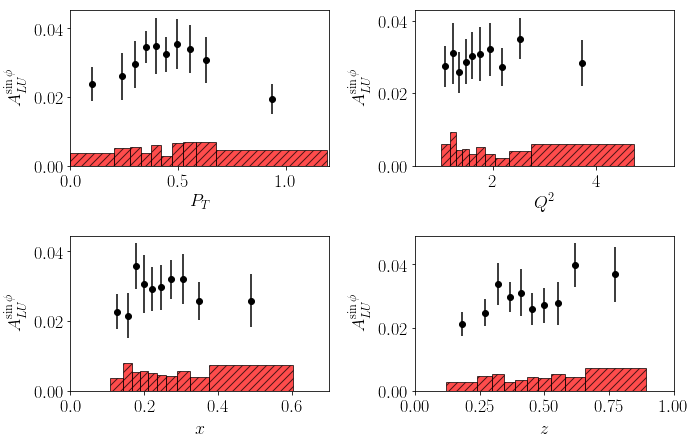

In [6]:
plot_fit_summary(data['fit'], 0)
plt.savefig('image/alu_sin.pdf', bbox_inches='tight')

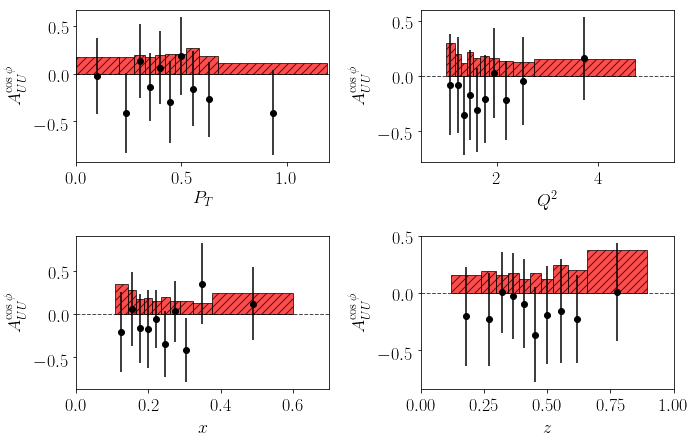

In [7]:
plot_fit_summary(data['fit'], 1)
plt.savefig('image/auu_cos.pdf', bbox_inches='tight')

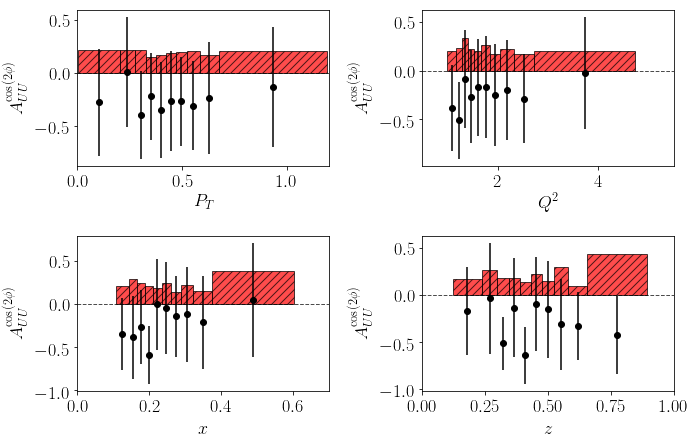

In [8]:
plot_fit_summary(data['fit'], 2)
plt.savefig('image/auu_cos2.pdf', bbox_inches='tight')